In [2]:
import numpy as np
import os
import cv2
from tqdm import tqdm
import random
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [3]:
dirpath = "path to directory containing folders with folders of animal pictures"
animals = []
for i in os.listdir(dirpath):
    animals.append(i)
    
size = 125

training_data = []

for animal in animals:
    animal_folder = os.path.join(dirpath,animal)
    animal_num = animals.index(animal)
    for animal_pic in tqdm(os.listdir(animal_folder)):
        animal_pic_path = os.path.join(animal_folder, animal_pic)
        image_array = cv2.imread(animal_pic_path)
        image_array_resized = cv2.resize(image_array, (size, size))
        training_data.append([image_array_resized, animal_num])

100%|████████████████████████████████████████████████████████████████████████████| 1862/1862 [00:01<00:00, 1024.20it/s]


In [4]:
random.shuffle(training_data)

In [5]:
X = []
y = []

for feature, label in training_data:
    X.append(feature)
    y.append(label)
    
x = np.array(X)
y = np.array(y)

In [6]:
IMAGE_SHAPE = [size,size]

In [7]:
vgg = VGG16(input_shape= IMAGE_SHAPE + [3], weights='imagenet', include_top=False)

In [8]:
for layer in vgg.layers:
    layer.trainable = False

model = Sequential([
                    vgg,
                    layers.Flatten(),
                    layers.Dense(128, activation = 'relu'),
                    layers.Dense(9, activation = 'softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.fit(x, y, epochs=3, batch_size=32, validation_split= 0.2)

Epoch 1/3
534/534 [==============================] - 18s 33ms/step - loss: 0.1245 - accuracy: 0.9632 - val_loss: 0.7988 - val_accuracy: 0.8663
Epoch 2/3
534/534 [==============================] - 18s 34ms/step - loss: 0.1116 - accuracy: 0.9648 - val_loss: 0.8175 - val_accuracy: 0.8689
Epoch 3/3
534/534 [==============================] - 18s 34ms/step - loss: 0.0987 - accuracy: 0.9698 - val_loss: 0.9039 - val_accuracy: 0.8631


In [13]:
model.save('mymodel')

INFO:tensorflow:Assets written to: mymodel\assets


sheep


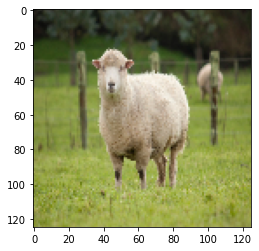

In [21]:
def test(filepath):
    img1 = image.load_img(filepath, target_size= (size,size))
    plt.imshow(img1)

    img1 = image.img_to_array(img1)
    img1 = np.expand_dims(img1,axis=0)

    model =  tensorflow.keras.models.load_model('mymodel')
    result_b = model.predict(img1)

    print(animals[np.argmax(result_b[0])])
    
    
test("sheep.jpg")